<a href="https://colab.research.google.com/github/ko-syo-noyome/OpenCV-lesson/blob/main/image_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploadrd=files.upload()

Saving copy.jpg to copy.jpg


In [ ]:
from google.colab import files
uploadrd=files.upload()

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("copy.jpg")


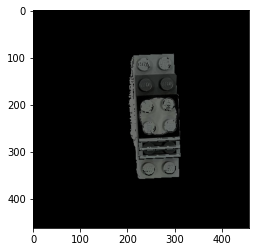

In [5]:
import cv2
import numpy as np

# グレーの検出
def detect_glay_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 青色のHSVの値域1
    hsv_min = np.array([0, 0, 0])
    hsv_max = np.array([115,115,115])
    #hsv_max = np.array([140,140,140])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    #masked_img = cv2.bitwise_not(img, img, mask=mask)

    return mask, masked_img


def detect_red_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 赤色のHSVの値域1
    hsv_min = np.array([0,64,0])
    hsv_max = np.array([30,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
    hsv_min = np.array([150,64,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色領域のマスク（255：赤色、0：赤色以外）    
    mask = mask1 + mask2

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 色検出（赤、緑、青）
glay_mask, glay_masked_img = detect_glay_color(img)
red_mask, red_masked_img = detect_red_color(img)


# 結果を出力
# cv2.imwrite("C:\prog\python\\test\\red_mask.png", red_mask)
# cv2.imwrite("C:\prog\python\\test\\red_masked_img.png", red_masked_img)
# cv2.imwrite("C:\prog\python\\test\green_mask.png", green_mask)
# cv2.imwrite("C:\prog\python\\test\green_masked_img.png", green_masked_img)
# cv2.imwrite("C:\prog\python\\test\\blue_mask.png", blue_mask)
# cv2.imwrite("C:\prog\python\\test\\blue_masked_img.png", blue_masked_img)

plt.imshow(glay_mask)
plt.imshow(glay_masked_img)


#plt.imshow(red_mask)
#plt.imshow(red_masked_img)


# plt.imshow(blue_mask)
# # plt.imshow(blue_masked_img)
# #plt.imshow(red_masked_img)


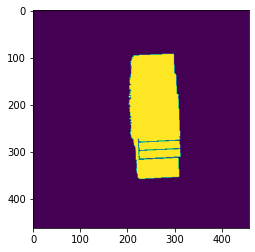

In [6]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 2値化する。
#bin_img = cv2.inRange(hsv, (0, 10, 0), (255, 255, 255))
#plt.imshow(bin_img)

# 輪郭抽出する。
contours, _ = cv2.findContours(glay_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 面積が最大の輪郭を取得する
contour = max(contours, key=lambda x: cv2.contourArea(x))

mask = np.zeros_like(glay_mask)
cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
plt.imshow(mask)